# Get Onsets for SPM

### get packages

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### read logfile

E.g. a psychopy .log file

In [1]:
my_file = 'FILE-NAME.log'

In [7]:
with open(my_file) as f:
    txt = f.readlines()

### find first trigger

In [215]:
d = {}

In [216]:
for line in txt:
    if 'Keypress: s\n' in line:
        my_mri_start = float(line.split()[0])
        break

In [217]:
my_mri_start

75.7948

### find one condition

In [218]:
has_started = False
count_scanner = 0

for line in txt:
        
    if 'MYCOND: autoDraw = True' in line: 
        has_started = True
        time, _, info = line.split('\t')
        time = float(time)

    if 'MYCOND: markerPos' in line and has_started:
        d[time] = float(line.split('\t')[-1].split()[-1].split('\n')[0])
    
    if 'MYCOND: autoDraw = False' in line:
        has_started = False
        
    if 'wait_scanner' in line and 'autoDraw = True' in line:
        count_scanner += 1
    
    if count_scanner > 1:
        break

### make dataframe

In [220]:
df = pd.DataFrame(d, index=[0]).T
df = df.sort_index()

#### shift timing to first MRI pulse

In [221]:
df.index = df.index - my_mri_start

In [222]:
df

0
3.5604     40.0
25.0196    10.0
48.6179    60.0
70.8318    80.0
94.1524    20.0
121.4498   40.0
146.7542  100.0
168.2493   30.0
191.9857   20.0
216.3866    0.0
238.5950   30.0
263.0501  100.0
284.8294   20.0
306.6484   70.0
354.8970   30.0
379.6972  100.0
404.9460    0.0
431.2333   60.0
454.7470   40.0
478.3155   40.0
500.0623   10.0
525.6583    0.0
551.3608   20.0
597.1077   30.0
623.1801   20.0
647.2983   20.0
697.6780   20.0
724.2844   90.0
748.1498   40.0
769.5137    0.0
791.8457   10.0

### Visualize Conditions

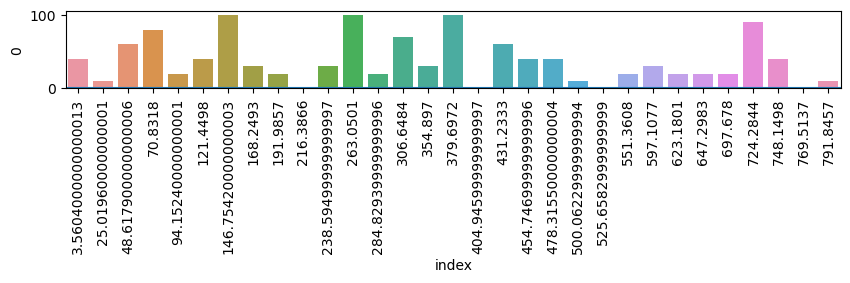

In [224]:
plt.figure(figsize=(10, 1))
sns.barplot(data=df.reset_index(),
            x='index', y=0)
plt.xticks(rotation=90)
plt.axhline(0)
plt.show()

### get all conditions

In [225]:
my_conditions = sorted(list(set(df[0])))
my_conditions

[0.0, 10.0, 20.0, 30.0, 40.0, 60.0, 70.0, 80.0, 90.0, 100.0]

#### number of conditions

In [226]:
n_conditions = len(my_conditions)
n_conditions

10

## make .m file for matlab

### names

In [227]:
matlab_str = f"names = cell (1,{n_conditions});\n"

In [228]:
for n, condition in enumerate(my_conditions):
    this_str = f"names{{{n+1}}} = 'MYCOND-{str(int(condition)).zfill(3)}';\n"
    matlab_str += this_str

In [229]:
print(matlab_str)

names = cell (1,10);
names{1} = 'punish-000';
names{2} = 'punish-010';
names{3} = 'punish-020';
names{4} = 'punish-030';
names{5} = 'punish-040';
names{6} = 'punish-060';
names{7} = 'punish-070';
names{8} = 'punish-080';
names{9} = 'punish-090';
names{10} = 'punish-100';



### onsets

In [231]:
matlab_str += f"\nonsets = cell (1,{n_conditions});\n"

In [232]:
for n, condition in enumerate(my_conditions):
    my_selection = df[df[0]==condition]
    this_str = f"onsets{{{n+1}}} = {list(my_selection.index)};\n"
    matlab_str += this_str

### durations

### last line for saving

### store as file

In [234]:
with open('my_matlab.m','w') as f:
    f.write(matlab_str)

## For reference: Template .m File